In [5]:
def reflexive(universal, relation):
    for a in universal:
        if not (a, a) in relation:
            return False
    return True

def irreflexive(universal, relation):
    for a in universal:
        if (a, a) in relation:
            return False
    return True

def symmetric(universal, relation):
    for a in universal:
        for b in universal:
            if (a, b) in relation and (b, a) not in relation:
                return False
    return True

def antisymmetric(universal, relation):
    for a in universal:
        for b in universal:
            if (a, b) in relation and (b, a) in relation and a != b:
                return False
    return True

def transitive(universal, relation):
    for a in universal:
        for b in universal:
            for c in universal:
                if ((a, b) in relation and (b, c) in relation) and not (a, c) in relation:
                    return False
    return True

In [6]:
def gcd(a, b):
    if not b:
        return a
    return gcd(b, a % b)

def lcm(a, b):
    if a == b == 0:
        return 0
    return abs(a*b)/gcd(a, b)

{'reflexive': True, 'irreflexive': False, 'symmetric': True, 'antisymmetric': True, 'transitive': True}
partial
equivalence


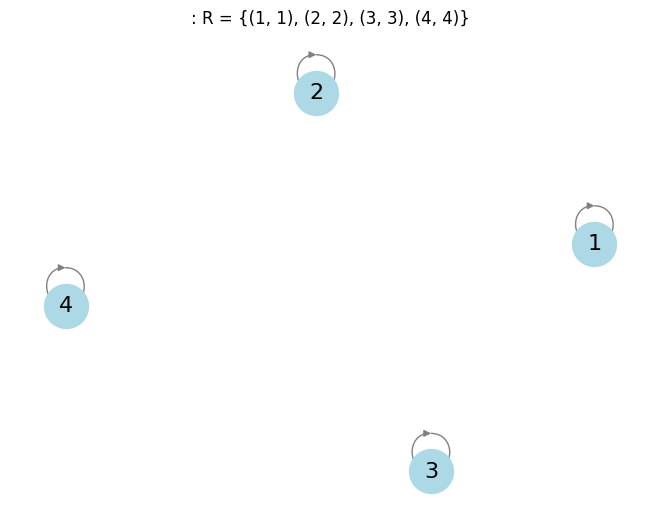

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph()

setA = [1, 2, 3, 4]
setB = []
universal = set(setA + setB)

graph.add_nodes_from(universal)

condition = ""
# relation = [(a, b) for a in setA for b in setB if eval(condition, {"a": a, "b": b, "gcd": gcd, "lcm": lcm})]
relation = [(a, b) for a in setA for b in setA if a == b]
graph.add_edges_from(relation)

properties = {
    'reflexive': reflexive,
    'irreflexive': irreflexive,
    'symmetric': symmetric,
    'antisymmetric': antisymmetric,
    'transitive': transitive
}

relation_props = dict([(prop, properties[prop](universal, relation)) for prop in properties])
print(relation_props)

if relation_props['reflexive'] and relation_props['antisymmetric'] and relation_props['transitive']:
    print('partial')
if relation_props['reflexive'] and relation_props['symmetric'] and relation_props['transitive']:
    print('equivalence')

nx.draw(graph, pos=nx.spring_layout(graph, k=1, scale=1), with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=16)
plt.title(f"{condition}: R = {f'{{{', '.join(map(str, relation))}}}'}")
plt.show()

In [8]:
a, b, c, d = 'a', 'b', 'c', 'd'
R = [(a, a), (a, b), (b, c), (c, b), (b, b), (c, c), (c, a)]
S = [(a, b), (a, c), (a, d), (b, a), (b, b), (c, a), (d, a), (d, d)]

def inv(R):
    return [(b, a) for a, b in R]

Rinv, Sinv = inv(R), inv(S)

def compose(R, S):
    result = []
    for a in R:
        for b in S:
            if a[1] != b[0] or (a[0], b[1]) in result: continue
            result.append((a[0], b[1]))
    return result

len(compose(Sinv, Rinv))

10

In [9]:
A = {3, 4, 5, 6}
R = [(a, b) for a in A for b in A if abs(a - b) % 2 == 0]

print(reflexive(A, R) and symmetric(A, R) and transitive(A, R))
R

True


[(3, 3), (3, 5), (4, 4), (4, 6), (5, 3), (5, 5), (6, 4), (6, 6)]

In [10]:
N = list(range(1, 101))
R = [(a, b) for a in N for b in N if b % a == 0]

[func(N, R) for func in [reflexive, antisymmetric, transitive]]

[True, True, True]

In [11]:
A = [2, 3, 4, 5]
R = [(5, 5), (5, 3), (2, 2), (2, 4), (3, 5), (3, 3), (4, 2), (4, 4)]

[func(A, R) for func in [reflexive, antisymmetric, transitive]]

[True, False, True]

In [20]:
print([2**n - 1 for n in range(1, 6)])
print([f'{20 - 3*n}/2 = {(20 - 3*n)/2}' for n in range(1, 6)])
print([f'1/{(-1)**n * n**2}' for n in range(1, 6)])
print([f'{3*n + 4}/{2*n - 1}' for n in range(1, 6)])

[1, 3, 7, 15, 31]
['17/2 = 8.5', '14/2 = 7.0', '11/2 = 5.5', '8/2 = 4.0', '5/2 = 2.5']
['1/-1', '1/4', '1/-9', '1/16', '1/-25']
['7/1', '10/3', '13/5', '16/7', '19/9']


In [23]:
result = []
curr = -15
for i in range(0, 11):
    result.append(curr)
    curr -= 7
print(result)

[-15, -22, -29, -36, -43, -50, -57, -64, -71, -78, -85]


In [1]:
[1 + n * 2 for n in range(4)]

[1, 3, 5, 7]

In [2]:
[38 + n * 12 for n in range(4)]

[38, 50, 62, 74]

In [5]:
len([i for i in range(256, 785) if i % 7 == 0])

76

In [7]:
def rec(n):
    if n == 0:
        return 2
    if n == 1:
        return -1
    return rec(n-1) - rec(n-2)

[rec(i) for i in range(2, 2+6)]

[-3, -2, 1, 3, 2, -1]

In [8]:
def rec(n):
    if n == 0:
        return 1
    return 3 * rec(n-1)**2

[rec(i) for i in range(1, 7)]

[3, 27, 2187, 14348907, 617673396283947, 1144561273430837494885949696427]

In [9]:
def rec(n):
    if n == 0:
        return -1
    if n == 1:
        return 0
    return n*rec(n-1) + rec(n-2)**2

[rec(i) for i in range(2, 2 + 6)]

[1, 3, 13, 74, 613, 9767]

In [10]:
[2**n + (-2)**n for n in range(4)]

[2, 0, 8, 0]

In [2]:
from collections import defaultdict

a, b, c, d, e, f, g, h, i = 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'

def get_adj(edges):
    adj = defaultdict(list)
    for u, v in edges:
        if v == None:
            adj[u] = []
            continue
        if v in adj[u]: continue
        adj[u].append(v)
    return adj

def get_degrees(edges):
    verticies = defaultdict(int)
    for u, v in edges:
        verticies[u] += 0 if v == None else 2 if u == v else 1
    return verticies

In [28]:
edges1 = [
    (a, a), (a, b), (a, b), (a, b), (a, e),
    (b, a), (b, a), (b, a), (b, c), (b, d), (b, e),
    (c, c), (c, b), (c, d), (c, d), (c, d),
    (d, b), (d, c), (d, c), (d, c), (d, e),
    (e, a), (e, b), (e, d)
]

print(get_adj(edges1))
print(get_degrees(edges1))

defaultdict(<class 'list'>, {'a': ['a', 'b', 'e'], 'b': ['a', 'c', 'd', 'e'], 'c': ['c', 'b', 'd'], 'd': ['b', 'c', 'e'], 'e': ['a', 'b', 'd']})
defaultdict(<class 'int'>, {'a': 6, 'b': 6, 'c': 6, 'd': 5, 'e': 3})


In [36]:
edges2 = [
    (a, c), (a, e), (a, i),
    (b, e), (b, h),
    (c, a), (c, e), (c, g), (c, i),
    (d, None),
    (e, a), (e, b), (e, c), (e, g), (e, g), (e, g),
    (f, None),
    (g, c), (g, e), (g, e), (g, e),
    (h, b), (h, i),
    (i, c), (i, h), (i, a)
]

get_adj(edges2)
# get_degrees(edges2)

defaultdict(list,
            {'a': ['c', 'e', 'i'],
             'b': ['e', 'h'],
             'c': ['a', 'e', 'g', 'i'],
             'd': [],
             'e': ['a', 'b', 'c', 'g'],
             'f': [],
             'g': ['c', 'e'],
             'h': ['b', 'i'],
             'i': ['c', 'h', 'a']})

In [34]:
def detect_cycle(graph):
    visited = set()

    def dfs(vertex, parent):
        visited.add(vertex)
        for neighbor, edge_id in graph[vertex]:
            if neighbor not in visited:
                if dfs(neighbor, (vertex, edge_id)): return True
            elif (neighbor, edge_id) != parent: return True
        return False
    
    for vertex in graph:
        if vertex not in visited and dfs(vertex, None):
            print(vertex, graph[vertex])
            return True
    return False

def get_adj_multi(edges):
    adj = defaultdict(list)
    for u, v in edges:
        if v == None:
            adj[u] = []
            continue
        if v in adj[u]: continue
        count = 1
        for vertex in adj[u]:
            count += 1 if vertex[0] == u else 0
        adj[u].append((v, count))
    return adj

def undirected(edges):
    return edges + [(b, a) for a, b in edges]

edges1 = undirected([(a, b), (b, c), (a, d)])
edges2 = undirected([(a, d), (a, e), (d, e), (b, c)])
edges3 = undirected([(a, b), (b, b), (b, e), (d, c), (d, c)])

detect_cycle(get_adj_multi(edges3))

# detect_cycle(get_adj(edges1))
# detect_cycle(get_adj(edges2))

a [('b', 1)]


True

In [67]:
from collections import defaultdict, deque

def is_bipartite(graph):
    color_map = defaultdict(str)
    color1, color2 = 'red', 'blue'

    # for every vertex in graph
    for start_vertex in graph:
        # if it's not already colored
        if start_vertex not in color_map:
            # BFS traversal of adjacent nodes
            queue = deque([start_vertex])
            color_map[start_vertex] = color1

            while queue:
                vertex = queue.popleft()
                current_color = color_map[vertex]
                next_color = color1 if current_color == color2 else color2

                for neighbor in graph[vertex]:
                    # give adjacent next color and traverse it next
                    if neighbor not in color_map:
                        color_map[neighbor] = next_color
                        queue.append(neighbor)
                    # if adjacent node has same color, not bipartite
                    elif color_map[neighbor] == current_color:
                        return False

    def get_color(color):
        return [vertex for vertex in color_map if color_map[vertex] == color]

    print("V1 (", color1, "):", get_color(color1))
    print("V2 (", color2, "):", get_color(color2))
    return True


# is_bipartite(get_adj(undirected([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)])))
# is_bipartite(get_adj(undirected([(a, b), (a, d), (a, e), (b, f), (b, c), (c, f), (c, d), (c, e)])))
# is_bipartite(get_adj(undirected([(1, 2), (1, 6), (2, 3), (2, 4), (2, 5), (5, 6), (4, 5)])))
# is_bipartite(get_adj(undirected([(a, b), (a, f), (b, e), (b, d), (c, f), (c, d), (e, d), (e, f)])))

# is_bipartite(get_adj(undirected([(1, 2), (1, 4), (1, 5), (3, 2), (3, 4), (3, 5)])))
is_bipartite(get_adj(undirected([(a, f), (a, e), (b, d), (b, c), (c, e), (f, d)])))
# is_bipartite(get_adj(undirected([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 1)])))

V1 ( red ): ['a', 'd', 'c']
V2 ( blue ): ['f', 'e', 'b']


True